## Price Prediction of USA High Quality Backpacks

Dataset :
Download the dataset assigned to your group from the below link :
https://drive.google.com/file/d/18NNIgognzWnwPbclCkdak6oTABR92lUw/vie
w?usp=share_link

### Dataset-based Implementation
Use python based APIs and perform the following three classes of activities.

#### EDA
Perform Exploratory Data Analysis to gather insight from the dataset. Write your
inference about the analysis learned from visualizations
#### Classification
CLASSIFICATION (any of the Logistic Regression / SVM / Decision Tree/ Naïve
Bayes/KNN/ANN). Justify your design choices at each step: Write
#### Regression
Any of the Linear Regression (any of Gradient / Stochastic /
MiniBatch)/linear basis models/KNN/Locally weighted regression/ any of
the regularization techniques). Justify your design choices at each step: Write
as a markdown cell in jupyter notebook at the beginning of each subsection.
#### Ensemble ML
Justify your design choices at each step: Write as a markdown cell in jupyter
notebook at the beginning of each subsection.

#### Coding begins here

In [1]:
# Please install python libraries for wordcloud & missingno if it installed in the system
!pip install wordcloud
!pip install missingno

In [2]:
#Import library/pakages for data analysis & machine learning activity
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data view in graphically
import seaborn as sns # using for EDA
from wordcloud import WordCloud, STOPWORDS #using for wordcloud
import re #for regular expression
from sklearn.preprocessing import LabelEncoder # for lable encoding
from sklearn.tree import DecisionTreeClassifier # decision tree for classification
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from wordcloud import WordCloud, STOPWORDS #using for wordcloud
import missingno as msno #look for missing values

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
#load file from google drive as per given assignment
url='https://drive.google.com/file/d/18NNIgognzWnwPbclCkdak6oTABR92lUw/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
print(url)
backpacks = pd.read_csv(url)
#Inspect labled data
backpacks.head(3)

https://drive.google.com/uc?id=18NNIgognzWnwPbclCkdak6oTABR92lUw


,Product,Brand,Country of Origin,Type,Image URL,Laptop Compartment,Capacity (Volume in Liter),Material,Average Weight (Kg),Waterproof,Water-repellent,Price (USD)
0,Surge Backpack,The North Face,USA,Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,31,210D recycled nylon ripstop with non-PFC durab...,1.2,No,Yes,129
1,Borealis Backpack,The North Face,USA,Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,28,210D recycled nylon ripstop with non-PFC durab...,1,No,Yes,99
2,Router Backpack,The North Face,USA,Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,40,210D recycled nylon ripstop with non-PFC durab...,1.3,No,Yes,159


In [5]:
print('Number of duplicate rows found in the dataset: ',len(backpacks) - len(backpacks.drop_duplicates()))
backpacks = backpacks.drop_duplicates(keep='first')

Number of duplicate rows found in the dataset:  0


In [6]:
#replace name for Capacity column to better match other column names
backpacks.rename(columns = {'Capacity (Volume in Liter)' : 'Capacity (L)', }, inplace = True)

#After replace lable name verifying the data quality
backpacks.sample(15)

,Product,Brand,Country of Origin,Type,Image URL,Laptop Compartment,Capacity (L),Material,Average Weight (Kg),Waterproof,Water-repellent,Price (USD)
33,Patagonia Arbor Classic Pack,Patagonia,USA,Daypack,https://www.rei.com/media/product/1347560006,Yes,25,"YKK Zippers, Duraflex Hardware, Polyester, DWR...",0.6,No,Yes,48.93
56,River Bag,Topo Design,USA,Daypack/Outdoor,https://cdn.shopify.com/s/files/1/0277/0693/pr...,Not Specified,12.8,"1000D recycled nylon, 200D recycled nylon pack...",Not Specified,No,Yes,109
73,Ruckpack - Ballistic Nylon,DSPTCH®,USA,Daypack/Outdoor,https://cdn.shopify.com/s/files/1/0095/2362/pr...,Yes,25,1680D Ballistic Nylon with DWR coating,1.36,No,Yes,275
6,Mountain Daypack—L,The North Face,USA,Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,20,"70D recycled nylon, 75D recycled nylon ripstop...",0.625,No,Yes,99
50,Echo Ruck - USA,Goruck,USA,Daypack/Traveling/Outdoor/Tactical,https://cdn.shopify.com/s/files/1/0275/4985/99...,Yes,16,Primary Material (1000D Cordura),0.9,No,Yes,295
58,Mountain Pack 28L,Topo Design,USA,Daypack/Outdoor,https://cdn.shopify.com/s/files/1/0277/0693/pr...,Yes,28,"200D lightweight recycled nylon ripstop, 210D ...",Not Specified,No,Yes,179
83,ConcealPack™ 21L EDC - XPAC XV21 Fatigue,THE BROWN BUFFALO®,USA,Daypack/Outdoor,https://cdn.shopify.com/s/files/1/1456/9506/pr...,Not Included - Sold Separately,21,"DWR Coated, XPAC® VX21, Fatigue",1.33,No,Yes,350
47,Rucker 4.0,Goruck,USA,Daypack/Traveling/Outdoor/Tactical,https://cdn.shopify.com/s/files/1/0275/4985/99...,Yes,20 - 25,Primary Material (Cordura),1.2 - 1.5,No,Yes,225
11,Borealis Sling,The North Face,USA,Daypack,https://images.thenorthface.com/is/image/TheNo...,Not Specified,6,210D recycled nylon ripstop with non-PFC durab...,0.3,No,Yes,59
54,Core Pack,Topo Design,USA,Daypack/Outdoor,https://cdn.shopify.com/s/files/1/0277/0693/pr...,Yes,25,1000D recycled nylon with water repellent fini...,Not Specified,No,Yes,129


# Data Wrangling

In [7]:
#inspect dataframe
backpacks.describe()

,Product,Brand,Country of Origin,Type,Image URL,Laptop Compartment,Capacity (L),Material,Average Weight (Kg),Waterproof,Water-repellent,Price (USD)
count,107,107,107,107,107,107,107,107,107,107,107,107
unique,107,9,1,18,107,5,47,77,50,1,1,55
top,Surge Backpack,The North Face,USA,Daypack/Outdoor,https://images.thenorthface.com/is/image/TheNo...,Yes,25,210D recycled nylon ripstop with non-PFC durab...,Not Specified,No,Yes,99
freq,1,26,107,57,1,75,9,9,25,107,107,10


In [8]:
#look for 'Not Specified' and replace with nan
backpacks = backpacks.replace('Not Specified', np.nan)

<AxesSubplot:>

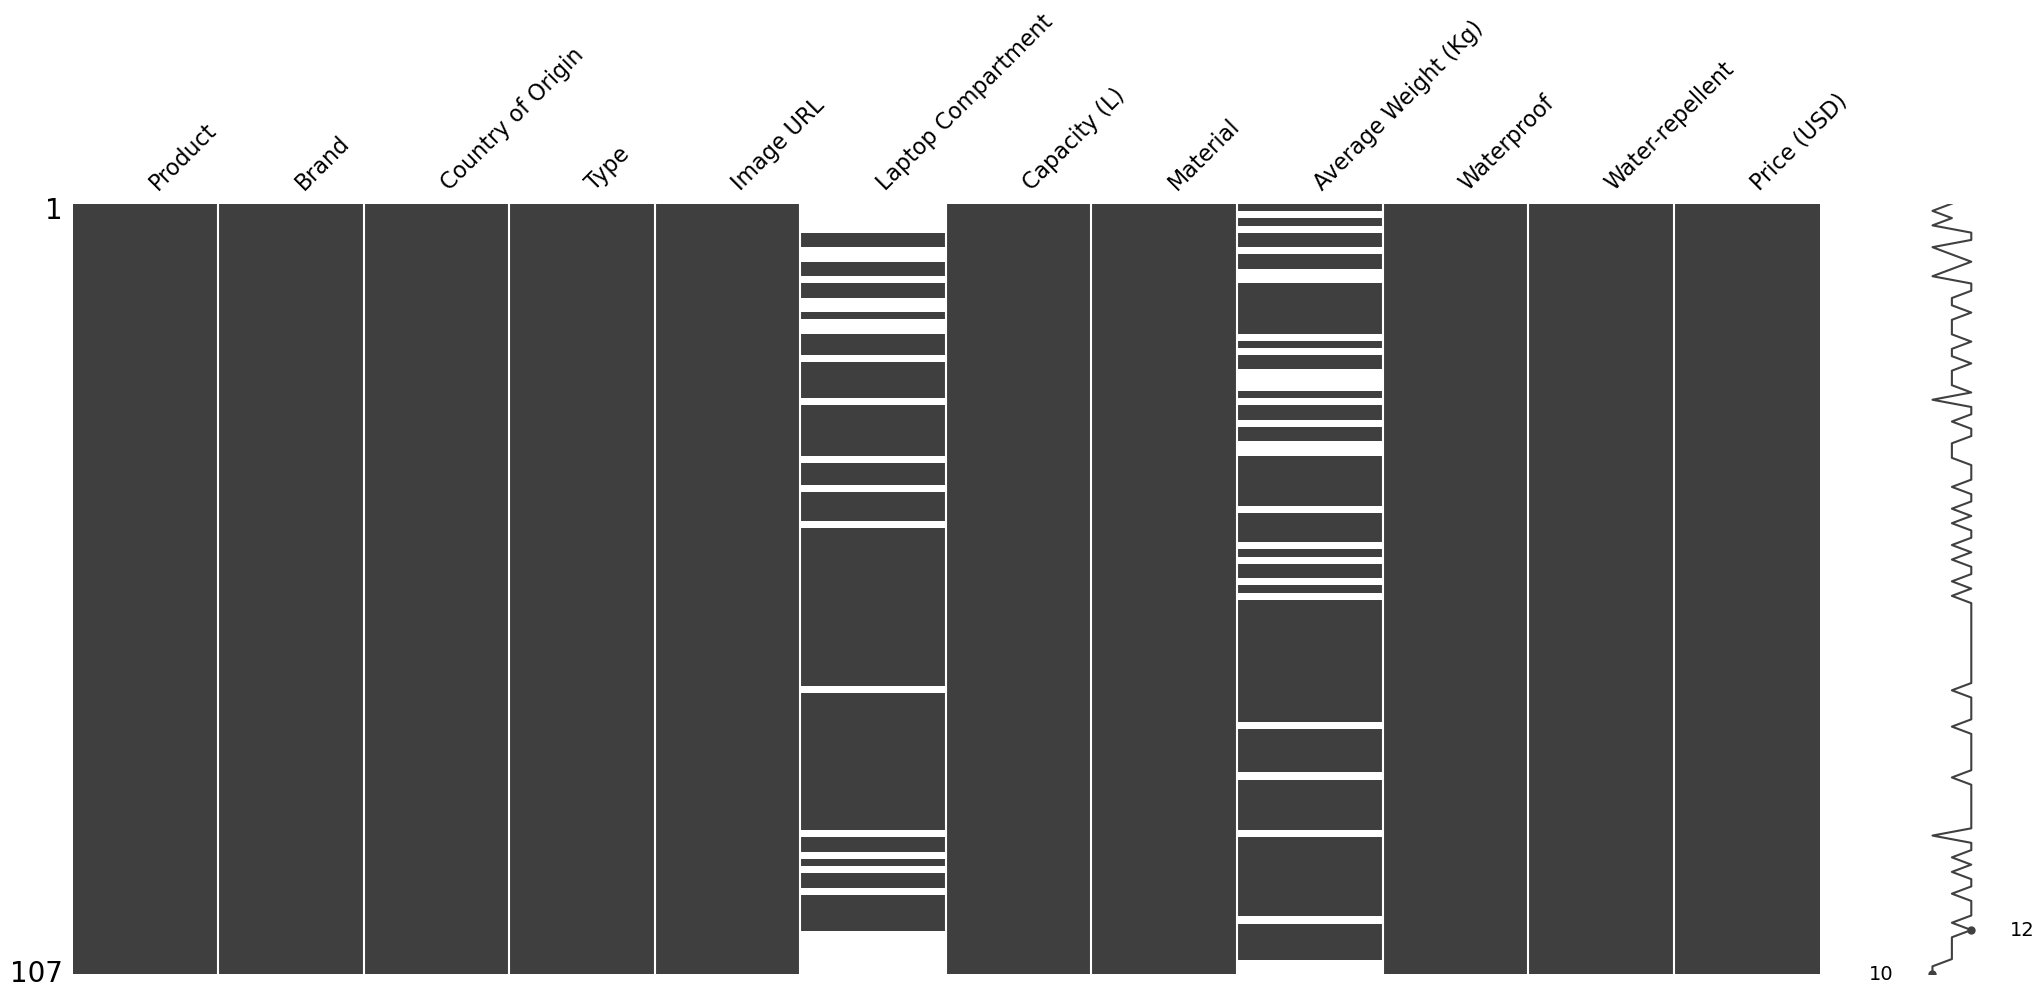

In [9]:
#use matrix, sort by capacity to gain insight on missing Average Weight
msno.matrix(backpacks.sort_values('Capacity (L)'))

**Observations:**
- There are 107 unique backpacks and image urls.
- We have to check null values accross columns.
- There are 18 'types', we will explore the unique values later on, as some backpacks are of multiple types.
- There are 77 materials, we will find out a way to extract the primary material for each backpack.
- Every entry on the dataset is not waterproof but is water-repellent, we will drop those columns.

**Cleaning Strategy**
- If the entry on a numeric column is a range of values, we will impute the average of range.
- We will use the explode parameter on str.split to multiple entries of the same bag that has multiple types.
- We will try to extract the main material by processing the Material Column.
- Since the Material Column states whether it was recycled, we will create a new column on whether it was recycled.

In [10]:
#To look at rows where Capacity(L) is either a range of numbers or a set of numbers.
backpacks[backpacks['Capacity (L)'].str.contains('/|-')]

,Product,Brand,Country of Origin,Type,Image URL,Laptop Compartment,Capacity (L),Material,Average Weight (Kg),Waterproof,Water-repellent,Price (USD)
20,Berkeley Daypack,The North Face,USA,Daypack,https://m.media-amazon.com/images/G/01/Shopbop...,NaN,15 - 25,Recycled Nylon or Polyster (Details Not Specif...,NaN,No,Yes,68.95
25,Slackpack 2.0 Backpack,The North Face,USA,Skiing/Mountaineering,https://images.thenorthface.com/is/image/TheNo...,NaN,20 - 30,Recycled Nylon or Polyster (Details Not Specif...,NaN,No,Yes,99
26,Black Hole® Pack 32L,Patagonia,USA,Daypack/Outdoor,https://www.patagonia.com/dw/image/v2/BDJB_PRD...,Yes,26 - 32,Body: 8.7-oz 300-denier 100% postconsumer recy...,0.81,No,Yes,169
27,Refugio Daypack 30L,Patagonia,USA,Daypack/Outdoor,https://www.patagonia.com/dw/image/v2/BDJB_PRD...,Yes,26 - 30,Body: 7.3-oz 400-denier 100% postconsumer recy...,0.795,No,Yes,119
28,Black Hole® Pack 25L,Patagonia,USA,Daypack/Outdoor,https://www.patagonia.com/dw/image/v2/BDJB_PRD...,Yes,25 - 32,Body: 8.7-oz 300-denier 100% postconsumer recy...,0.65,No,Yes,149
31,Descensionist Pack 40L,Patagonia,USA,Daypack/Outdoor,https://www.patagonia.com/dw/image/v2/BDJB_PRD...,Yes,32 - 40,Body: 5.8-oz 420-denier 100% recycled nylon ri...,1.28,No,Yes,219
42,Mission Duffel,Mystery Ranch,USA,Daypack/Outdoor/Tactical,https://www.mysteryranch.com/Products/Mission%...,NaN,40/55/90,"Black: 840D TPU, Shadow: 1000D, CORDURA®, Wood...",1.7 - 2.9,No,Yes,250
44,GR1®,Goruck,USA,Daypack/Traveling/Outdoor/Tactical,https://cdn.shopify.com/s/files/1/0275/4985/99...,Yes,21 - 26,Primary Material (1000D Cordura),1.3 - 1.5,No,Yes,325
45,GR2®,Goruck,USA,Daypack/Traveling/Outdoor/Tactical,https://cdn.shopify.com/s/files/1/0275/4985/99...,Yes,26 - 40,Primary Material (1000D Cordura),1.5 - 1.9,No,Yes,395
47,Rucker 4.0,Goruck,USA,Daypack/Traveling/Outdoor/Tactical,https://cdn.shopify.com/s/files/1/0275/4985/99...,Yes,20 - 25,Primary Material (Cordura),1.2 - 1.5,No,Yes,225


In [11]:
backpacks[backpacks['Capacity (L)'].str.contains('/')]

,Product,Brand,Country of Origin,Type,Image URL,Laptop Compartment,Capacity (L),Material,Average Weight (Kg),Waterproof,Water-repellent,Price (USD)
42,Mission Duffel,Mystery Ranch,USA,Daypack/Outdoor/Tactical,https://www.mysteryranch.com/Products/Mission%...,NaN,40/55/90,"Black: 840D TPU, Shadow: 1000D, CORDURA®, Wood...",1.7 - 2.9,No,Yes,250


In [12]:
#to delete whitespaces in specified columns
backpacks['Capacity (L)'] = backpacks['Capacity (L)'].str.replace(' ','')
backpacks['Average Weight (Kg)'] = backpacks['Average Weight (Kg)'].str.replace(' ','')
backpacks['Price (USD)'] = backpacks['Price (USD)'].str.replace(' ','')
#show unique values
display(backpacks['Capacity (L)'].unique())
display(backpacks['Average Weight (Kg)'].unique())
display(backpacks['Price (USD)'].unique())

array(['31', '28', '40', '23', '32', '20', '18', '26', '55', '36', '6',
       '65', '16', '27', '38', '34', '75', '30', '15-25', '85', '24',
       '10', '20-30', '26-32', '26-30', '25-32', '32-40', '25', '22',
       '35', '40/55/90', '21-26', '26-40', '45', '20-25', '33-39', '15',
       '24.3', '12.8', '21.6', '21', '18.5', '23.8', '12', '42', '44',
       '46'], dtype=object)

array(['1.2', '1', '1.3', '0.9', '0.74', '1.25', '0.625', '0.485', '1.7',
       '0.3', '2', '1.8', '0.54', '1.27', nan, '1.1', '0.6', '0.69',
       '0.34', '0.81', '0.795', '0.65', '0.52', '1.19', '1.28', '0.37',
       '1.29', '0.66', '0.8', '0.679', '0.89', '1.7-2.9', '0.4',
       '1.3-1.5', '1.5-1.9', '2.5', '1.2-1.5', '1.7-2.1', '0.73', '1.36',
       '0.45', '1.33', '1.17', '0.303', '0.647', '0.64', '0.88', '1.6',
       '1.5', '1.45'], dtype=object)

array(['129', '99', '159', '69', '79', '169', '119', '59', '189', '250',
       '89', '149', '179', '320', '68.95', '350-450', '109', '219',
       '48.93', '199', '175', '325', '395', '425', '225', '255', '160',
       '295', '345', '229', '275', '168', '260', '198', '136.5', '204',
       '172', '350', '60', '67.5', '52.5', '120', '105', '125', '145',
       '135', '88.5', '131', '145.7', '156', '166.5', '88.45', '93.65',
       '145.68', '151'], dtype=object)

We will delete the Mission Duffel bag from Mystery Ranch. When we look for it there are three bags(40/55/90) that shows up. we cannot confirm which bag is supposed to be on the dataset.

In [13]:
# delete row number 42 invalid data
#backpacks.drop(42, axis = 0, inplace = True)
backpacks.drop(backpacks[backpacks['Capacity (L)'].str.contains('/')].index, axis = 0, inplace = True)

In [14]:
backpacks[backpacks['Capacity (L)'].str.contains('/')].count()

Product                0
Brand                  0
Country of Origin      0
Type                   0
Image URL              0
Laptop Compartment     0
Capacity (L)           0
Material               0
Average Weight (Kg)    0
Waterproof             0
Water-repellent        0
Price (USD)            0
dtype: int64

In [15]:
#function that converts the list of strings to a list of float and take its average, then return the average.
def take_average(nums_list):
    #When the values are available
    try:
        nums_list = nums_list.split('-')
        nums_list = [float(x) for x in nums_list]
        nums_list = np.array(nums_list)
        ave = np.mean(nums_list)
    #to handle null values
    except:
        ave = np.nan
    return ave

In [16]:
#Transform the Capacity and Average Weight columns using take_average, returns float
backpacks['Capacity (L)'] = backpacks['Capacity (L)'].apply(lambda x: take_average(x))
backpacks['Average Weight (Kg)'] = backpacks['Average Weight (Kg)'].apply(lambda x: take_average(x))
backpacks['Price (USD)'] = backpacks['Price (USD)'].apply(lambda x: take_average(x))

In [17]:
#display not a number values
backpacks[backpacks['Average Weight (Kg)'].isna()]

,Product,Brand,Country of Origin,Type,Image URL,Laptop Compartment,Capacity (L),Material,Average Weight (Kg),Waterproof,Water-repellent,Price (USD)
17,Snomad 34 Backpack,The North Face,USA,Skiing/Mountaineering,https://images.thenorthface.com/is/image/TheNo...,NaN,34.0,Recycled Nylon and Polyster (Details Not Speci...,NaN,No,Yes,169.00
18,Griffin 75 Backpack,The North Face,USA,Hiking/Mountaineering,https://images.thenorthface.com/is/image/TheNo...,NaN,75.0,Recycled Nylon and Polyster (Details Not Speci...,NaN,No,Yes,320.00
20,Berkeley Daypack,The North Face,USA,Daypack,https://m.media-amazon.com/images/G/01/Shopbop...,NaN,20.0,Recycled Nylon or Polyster (Details Not Specif...,NaN,No,Yes,68.95
21,North Face Fovero 85,The North Face,USA,Hiking/Mountaineering,https://www.amazon.com/North-Face-Fovero-Falco...,NaN,85.0,Recycled Nylon or Polyster (Details Not Specif...,NaN,No,Yes,400.00
25,Slackpack 2.0 Backpack,The North Face,USA,Skiing/Mountaineering,https://images.thenorthface.com/is/image/TheNo...,NaN,25.0,Recycled Nylon or Polyster (Details Not Specif...,NaN,No,Yes,99.00
52,Rover Pack Classic,Topo Design,USA,Daypack/Outdoor,https://cdn.shopify.com/s/files/1/0277/0693/pr...,Yes,20.0,"1000D recycled nylon, 420D recycled nylon, 210...",NaN,No,Yes,99.00
53,Rover Pack Tech,Topo Design,USA,Daypack/Outdoor,https://cdn.shopify.com/s/files/1/0277/0693/pr...,Yes,24.3,"1000D recycled nylon, 420D recycled nylon,210D...",NaN,No,Yes,129.00
54,Core Pack,Topo Design,USA,Daypack/Outdoor,https://cdn.shopify.com/s/files/1/0277/0693/pr...,Yes,25.0,1000D recycled nylon with water repellent fini...,NaN,No,Yes,129.00
55,Rover Pack Canvas,Topo Design,USA,Daypack/Outdoor,https://cdn.shopify.com/s/files/1/0277/0693/pr...,Yes,20.0,12oz cotton canvas with water repellent finish...,NaN,No,Yes,109.00
56,River Bag,Topo Design,USA,Daypack/Outdoor,https://cdn.shopify.com/s/files/1/0277/0693/pr...,NaN,12.8,"1000D recycled nylon, 200D recycled nylon pack...",NaN,No,Yes,109.00


In [18]:
#drop 'Waterproof', 'Water-repellent' and 'Country of Origin' columns due to all rows have same value
backpacks = backpacks.drop(['Waterproof', 'Water-repellent','Country of Origin'], axis = 1)
backpacks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 106
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product              106 non-null    object 
 1   Brand                106 non-null    object 
 2   Type                 106 non-null    object 
 3   Image URL            106 non-null    object 
 4   Laptop Compartment   80 non-null     object 
 5   Capacity (L)         106 non-null    float64
 6   Material             106 non-null    object 
 7   Average Weight (Kg)  81 non-null     float64
 8   Price (USD)          106 non-null    float64
dtypes: float64(3), object(6)
memory usage: 8.3+ KB


In [19]:
backpacks = backpacks.drop(['Product','Image URL',],axis=1)   # For columns with unique values (like ID)

In [20]:
backpacks.isna().sum()

Brand                   0
Type                    0
Laptop Compartment     26
Capacity (L)            0
Material                0
Average Weight (Kg)    25
Price (USD)             0
dtype: int64

**On Average Weight**
- We could impute the missing values with the average for each type then delete the skiing and travelling types. We could also make an assumption that the material and its capacity will help us determine the weights. But this could lead to misleading data. Thus we will delete the column since we would not gain insight from it.

In [21]:
backpacks = backpacks.drop(['Laptop Compartment'],axis=1)     # For columns with large number of missing values
backpacks = backpacks.drop(['Average Weight (Kg)'],axis=1)     # For columns with large number of missing values

In [22]:
#creating new dataset for column 'type' exploded
backpacks_type_exploded = backpacks.copy()
backpacks_type_exploded['Type'] = backpacks_type_exploded.Type.str.split('/')
backpacks_type_exploded = backpacks_type_exploded.explode('Type')

backpacks_type_exploded.head()

,Brand,Type,Capacity (L),Material,Price (USD)
0,The North Face,Daypack,31.0,210D recycled nylon ripstop with non-PFC durab...,129.0
1,The North Face,Daypack,28.0,210D recycled nylon ripstop with non-PFC durab...,99.0
2,The North Face,Daypack,40.0,210D recycled nylon ripstop with non-PFC durab...,159.0
3,The North Face,Commuting,23.0,300D recycled polyester with TPU laminate,129.0
3,The North Face,Daypack,23.0,300D recycled polyester with TPU laminate,129.0


In [23]:
#finding average weight and capacity for each type
#backpacks_by_type = backpacks_type_exploded.groupby('Type').agg({'Average Weight (Kg)' : 'mean', 'Capacity (L)' : 'mean'}).round(2)

#backpacks_by_type

In [24]:
#filtered data
#backpacks_type_exploded.query('Type == "Skiing" or Type == "Travelling"')

In [25]:
#change Price column into float
backpacks['Price (USD)'] = backpacks['Price (USD)'].astype('float')
#check if data cleansing is finished
backpacks.isna().sum(), backpacks.dtypes

(Brand           0
 Type            0
 Capacity (L)    0
 Material        0
 Price (USD)     0
 dtype: int64,
 Brand            object
 Type             object
 Capacity (L)    float64
 Material         object
 Price (USD)     float64
 dtype: object)

In [26]:
backpacks.describe()

,Capacity (L),Price (USD)
count,106.000000,106.000000
mean,27.359434,163.545849
std,11.982843,83.475313
min,6.000000,48.930000
25%,20.250000,99.000000
50%,25.000000,149.000000
75%,30.000000,189.000000
max,85.000000,425.000000


**We have finished imputing missing values and formated the data to support futher machine learning activity.**

# EDA

**Is Capacity and Price correlated?**

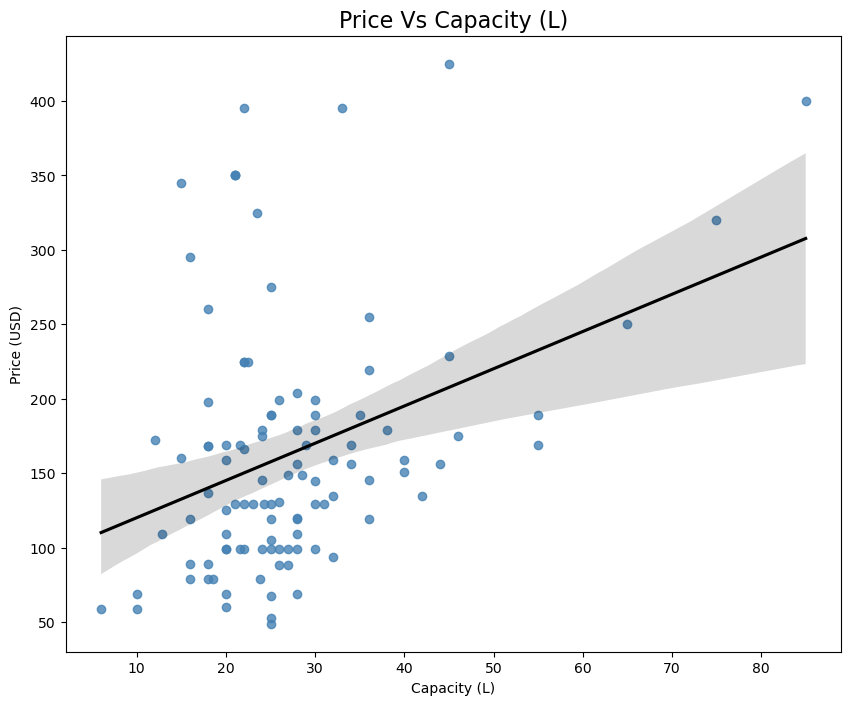

Pearson r =  0.36


In [27]:
# plt price vs capcity
fig = plt.subplots(figsize = (10,8))
ax = sns.regplot(data = backpacks, x = 'Capacity (L)', y = 'Price (USD)', color = 'steelblue', line_kws = {'color' : 'black'})
ax.set_title('Price Vs Capacity (L)', fontsize = 16)

plt.show()
print('Pearson r = ', backpacks[['Price (USD)', 'Capacity (L)']].corr().iloc[0,1].round(2))

A Pearson r score of 0.36 (less than 0.5) suggests that there is a weak positive correlation between price and capacity of the backpacks. Further exploration can be carried out into this relationship by limiting the price under 250$, since there are several data points in the 20 to 40 Litres range with high price.

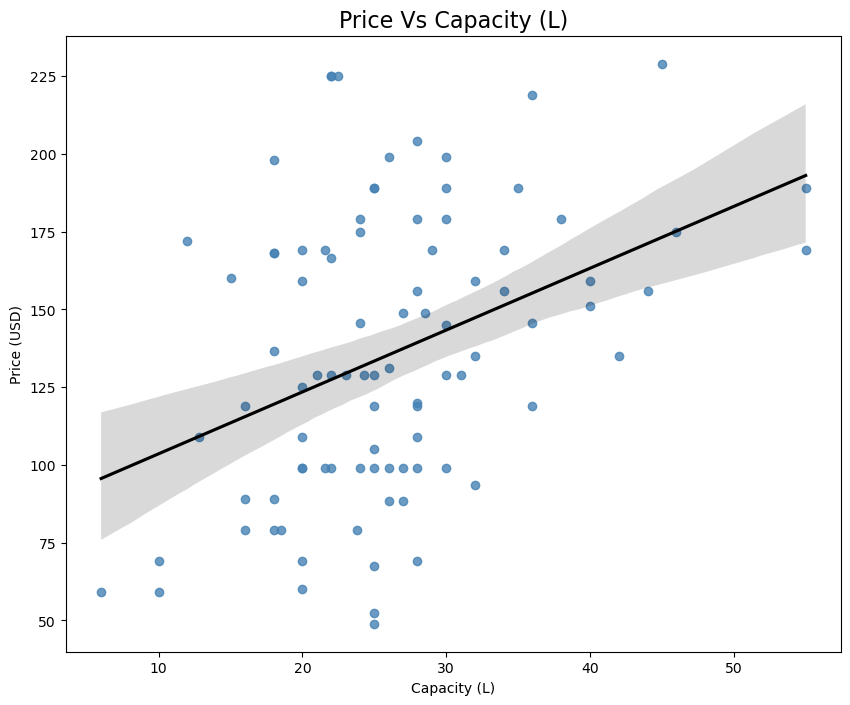

Pearson r =  0.38


In [28]:
#create a dataframe with only backpacks under 250$ only for study purposes
backpacks_under_250 = backpacks.query('`Price (USD)` < 250')

fig = plt.subplots(figsize = (10,8))
ax = sns.regplot(data = backpacks_under_250, x = 'Capacity (L)', y = 'Price (USD)', color = 'steelblue', 
                 line_kws = {'color' : 'black'})
ax.set_title('Price Vs Capacity (L)', fontsize = 16)

plt.show()
print('Pearson r = ', backpacks_under_250[['Price (USD)', 'Capacity (L)']].corr().iloc[0,1].round(2))

There is only a slight increase (0.36 to 0.38) in the Pearson r score, we can conclude that there is only a weak correlation between price and capacity.

**What materials are most prevalent in the high quality backpacks, and do they determine the price?**

We will use wordcloud to manually find the materials used for the backpacks. Note that we can manually look through all the columns since it is a small dataset, but this approach is quite a useful one to be explored.

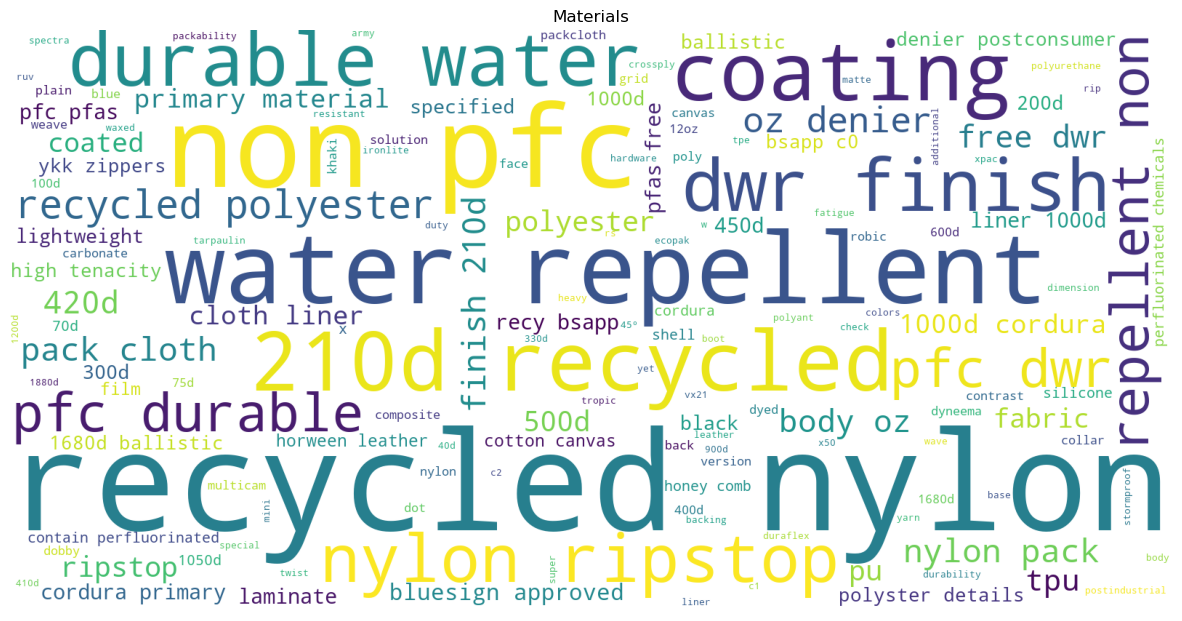

In [29]:
#generate text to use in wordcloud, join all entries in Material column into one string
text = ' '.join(backpacks.Material.str.lower())

#create and generate wordcloud image
wordcloud = WordCloud(width=1600, height=800, background_color="White", max_font_size=500, normalize_plurals=False).generate(text)
#wordcloud = WordCloud(width=1600, height=800, background_color="White", max_words=50, max_font_size=500, normalize_plurals=False).generate(text)
#create figure
plt.figure(figsize = (15,10))
plt.title("Materials")

#show image
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

We can see the materials used, but we will look at the unique values to be more confident on picking the primary materials.

In [30]:
#iterate the primary materials found
materials = ['cotton', 'cordura', 'dyneema', 'canvas', 'denier', 'nylon', 'polyester']

#create function to find primary material, we will assume that the first material in the description is the primary material
def find_primary_materials(entry):
    #initialize empty list
    materials_used = []
    #change string to lower case, then turn into list
    entry_as_list = entry.lower().replace('/',' ').split()
    #we will iterate through the list to find the matches, list the first match
    for word in entry_as_list:
        #initialize alphanumeric
        pattern = r'[^A-Za-z0-9]+'
        #remove non-alphanumeric characters in string
        word = re.sub(pattern, '', word)
        if word in materials:
            materials_used.append(word)
    #in case that the primary material is not included in our materials list
    if len(materials_used) == 0:
        materials_used = ['Other']
    #return our presumed primary material and capitalize for aesthetics
    return materials_used[0].capitalize()

In [31]:
#extract primary material of each backpack
backpacks['Material'] = backpacks['Material'].apply(lambda x: find_primary_materials(x))

In [32]:
display(backpacks.query('Material == "Other"'))

,Brand,Type,Capacity (L),Material,Price (USD)
39,Mystery Ranch,Daypack/Outdoor/Tactical,24.0,Other,175.0
83,THE BROWN BUFFALO®,Daypack/Outdoor,21.0,Other,350.0
85,THE BROWN BUFFALO®,Daypack/Outdoor,21.0,Other,350.0


Now that we are able to extract the primary material for each backpack, we can begin analysis about its material.

Text(0.5, 1.0, 'Prices distribution for each material')

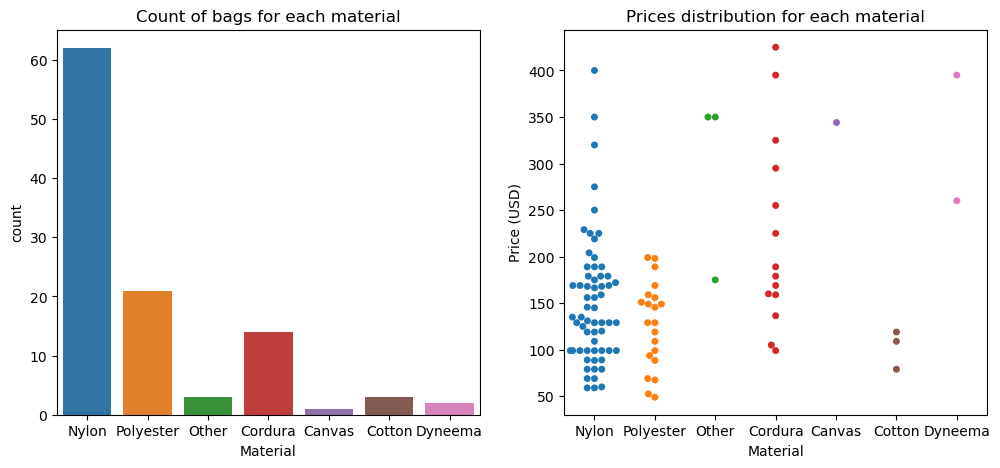

In [33]:
#create figure
fig, ax = plt.subplots(1,2, figsize = (12,5))

#create plot with counts of materials
ax1 = sns.countplot(data = backpacks, x = 'Material', ax = ax[0])
ax1.set_title('Count of bags for each material')

#create plot with prices for each material
ax2 = sns.swarmplot(data = backpacks, y = 'Price (USD)', x = 'Material')
ax2.set_title('Prices distribution for each material')

The most common primary material is Nylon. The prices for backpacks which uses nylon and polyester as primary materials seem to have the similar distribution (excluding outliers in Nylon). Cordura backpacks seem to have varying prices. Most backpacks tend to have prices from 50\\$ to 200\\$. We can conclude here that the materials used could determine the prices of the backpacks.

But before that, we should see whether any combination type, brand and materials could give us insights.

In [34]:
#reload exploded dataset to copy new Material values
backpacks_type_exploded = backpacks.copy()
backpacks_type_exploded['Type'] = backpacks_type_exploded.Type.str.split('/')
backpacks_type_exploded = backpacks_type_exploded.explode('Type')

#check dataframe
backpacks_type_exploded.head()

,Brand,Type,Capacity (L),Material,Price (USD)
0,The North Face,Daypack,31.0,Nylon,129.0
1,The North Face,Daypack,28.0,Nylon,99.0
2,The North Face,Daypack,40.0,Nylon,159.0
3,The North Face,Commuting,23.0,Polyester,129.0
3,The North Face,Daypack,23.0,Polyester,129.0


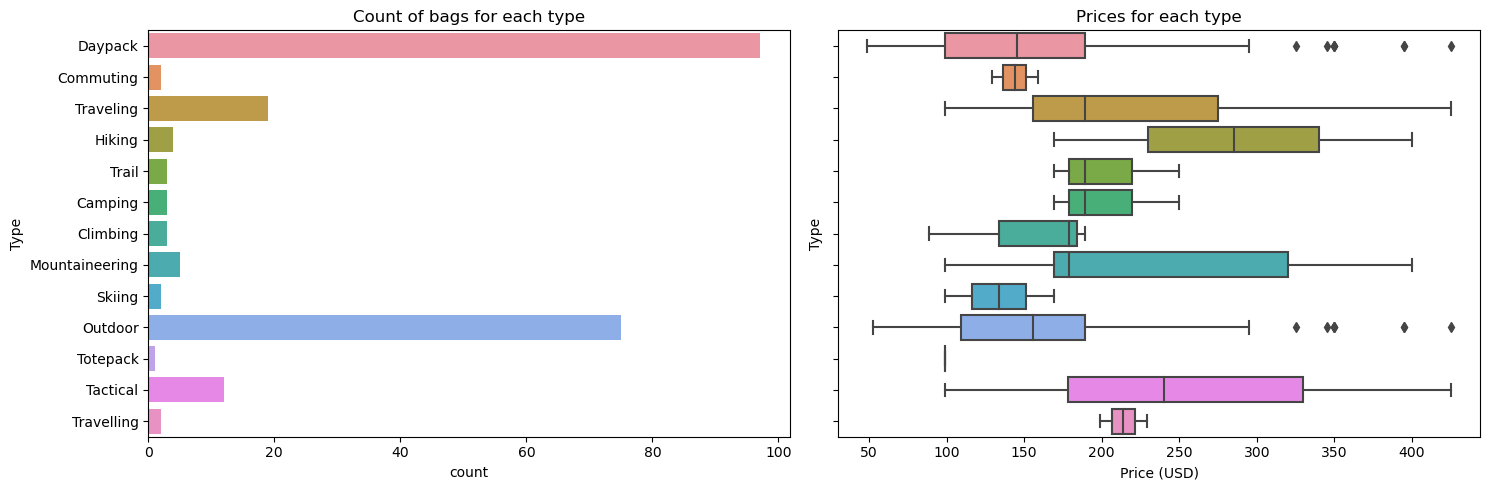

In [35]:
#create figure
fig, ax = plt.subplots(1,2, figsize = (15,5), tight_layout = True)

#create axis of counts by type
ax1 = sns.countplot(data = backpacks_type_exploded, y = 'Type', ax = ax[0])
ax1.set_title('Count of bags for each type')

#create axis of prices by type
ax2 = sns.boxplot(data = backpacks_type_exploded, x = 'Price (USD)', y = 'Type').set(yticklabels = [], title = 'Prices for each type')

plt.show()

We can see that Daypacks and Outdoor bags are the most prevalent, followed by Travelling bags. The prices are mostly around the 100\\$ to 200\\$ range. The travelling, climbing, camping and mountaineering types are worth exploring since the price distribution is skewed. This could mean that there are a few bags of those types which costs more. Also, they outdoor and daypacks produced some outliers. Those outliers could be the bags that are both outdoor and daypacks. We could do a little research on those bags to see why they are of that price.

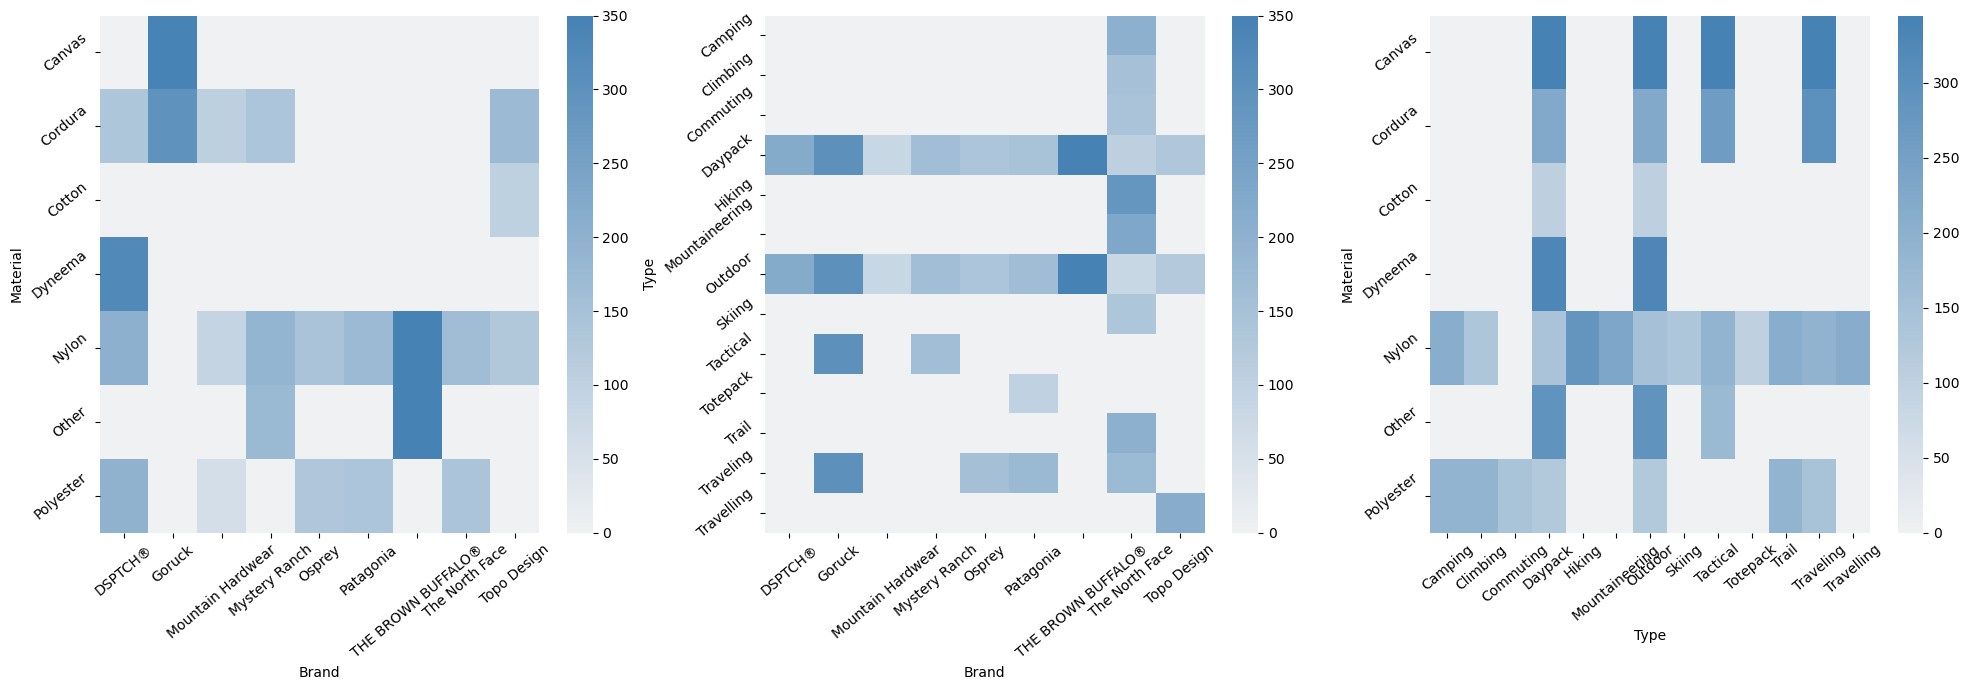

In [36]:
#set a light pallete for our heatmap
pallete = sns.light_palette('steelblue', as_cmap = True)

#define a function to create heatmaps from any columns on our data.
def create_heatmap(col1, col2, i):
    #create pivot table
    backpacks_pivot = pd.pivot_table(data = backpacks_type_exploded, 
                                     columns = col1,
                                     index = col2,
                                     values = 'Price (USD)',
                                     #fill with 0 so it shows up as a white space on the map
                                     fill_value = 0,
                                    aggfunc = 'mean')
    #create  the map from the table
    ax[i] = sns.heatmap(backpacks_pivot, cmap = pallete, ax = ax[i])
    #rotate the axis for easier reading
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation = 40)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 40)
    #return axis for plotting on the figure
    return ax

#create figure
fig, ax = plt.subplots(1,3, figsize = (20,7), tight_layout = True)

#fill in axes
create_heatmap('Brand', 'Material', 0)
create_heatmap('Brand', 'Type', 1)
create_heatmap('Type', 'Material', 2)

plt.show()

The variance in colors of the heatmap is used going across either vertically or horizontally to draw conclusions, since both axis are made of categorical variables.

Notice that the heatmaps are filled with white color. This means that those bags do not exist on the dataset provided.
When comparing using the material and brand, we can see that most brands tend to have the same price across different materials. Thus it can be said that the brand helps determine the price more.
While comparing the type and brand, same conclusion can be obtained that brand determines the prices more.
While comparing the prices through type and material, the prices tend to stay consistent through the materials, but have some variance with respect to the type of backpacks. Thus it can be concluded that the Type helps determine the price more.

#### Final Observation:
The bags capacity does have a weak correlation with prices, so bigger bags should not always be more expensive.
Categorically, it can be determine that the price is based on this order: brand, type, material. But this conclusion cannot be sure as the pivot table and heatmap is sparse.


# Machine learning activity

## Classification

In [37]:
#creating new dataset for classification from EDA
df = backpacks.copy()
df.columns

Index(['Brand', 'Type', 'Capacity (L)', 'Material', 'Price (USD)'], dtype='object')

In [38]:
# Split 'Type' column data with respect to '/'
temp_ = pd.DataFrame(df['Type'].str.split('/', expand=True))
for i in range(3):
    temp_[i+1] = temp_[i+1].fillna(temp_[0])
    df['Type'+str(i+1)] = temp_[i+1]
df['Type'] = temp_[0]

In [39]:
df

,Brand,Type,Capacity (L),Material,Price (USD),Type1,Type2,Type3
0,The North Face,Daypack,31.0,Nylon,129.00,Daypack,Daypack,Daypack
1,The North Face,Daypack,28.0,Nylon,99.00,Daypack,Daypack,Daypack
2,The North Face,Daypack,40.0,Nylon,159.00,Daypack,Daypack,Daypack
3,The North Face,Commuting,23.0,Polyester,129.00,Daypack,Commuting,Commuting
4,The North Face,Daypack,28.0,Polyester,69.00,Daypack,Daypack,Daypack
...,...,...,...,...,...,...,...,...
102,Osprey,Daypack,44.0,Polyester,156.00,Outdoor,Traveling,Daypack
103,Osprey,Daypack,36.0,Polyester,145.68,Outdoor,Traveling,Daypack
104,Osprey,Daypack,46.0,Nylon,175.00,Outdoor,Traveling,Daypack
105,Osprey,Daypack,28.0,Nylon,156.00,Outdoor,Traveling,Daypack


In [40]:
# One Hot Encoding to converts categorical data into a numeric form, 
# so as to convert them into the machine-readable form

one_hot_encoded_data = pd.get_dummies(df, columns=['Type','Type1','Type2','Type3','Brand','Material'])
df = one_hot_encoded_data.copy()


In [41]:
df.head()

,Capacity (L),Price (USD),Type_Climbing,Type_Commuting,Type_Daypack,Type_Hiking,Type_Skiing,Type_Traveling,Type1_Climbing,Type1_Daypack,...,Brand_THE BROWN BUFFALO®,Brand_The North Face,Brand_Topo Design,Material_Canvas,Material_Cordura,Material_Cotton,Material_Dyneema,Material_Nylon,Material_Other,Material_Polyester
0,31.0,129.0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,28.0,99.0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,40.0,159.0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,23.0,129.0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,28.0,69.0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [43]:
df.isna().sum()

Capacity (L)                0
Price (USD)                 0
Type_Climbing               0
Type_Commuting              0
Type_Daypack                0
Type_Hiking                 0
Type_Skiing                 0
Type_Traveling              0
Type1_Climbing              0
Type1_Daypack               0
Type1_Mountaineering        0
Type1_Outdoor               0
Type1_Totepack              0
Type1_Trail                 0
Type1_Traveling             0
Type1_Travelling            0
Type2_Camping               0
Type2_Climbing              0
Type2_Commuting             0
Type2_Daypack               0
Type2_Hiking                0
Type2_Outdoor               0
Type2_Skiing                0
Type2_Tactical              0
Type2_Traveling             0
Type3_Camping               0
Type3_Climbing              0
Type3_Commuting             0
Type3_Daypack               0
Type3_Hiking                0
Type3_Skiing                0
Type3_Tactical              0
Type3_Traveling             0
Brand_DSPT

In [51]:
# We have tried standard, robust and MinMax scaler - Used in the next code block
# Robust Scaler is used since the scaling is not affecting by outliers
# sc = StandardScaler()
# sc = RobustScaler()
# sc = MinMaxScaler()

cols_ = df.columns.drop('Price (USD)')
print(df.columns)

Index(['Capacity (L)', 'Price (USD)', 'Type_Climbing', 'Type_Commuting',
       'Type_Daypack', 'Type_Hiking', 'Type_Skiing', 'Type_Traveling',
       'Type1_Climbing', 'Type1_Daypack', 'Type1_Mountaineering',
       'Type1_Outdoor', 'Type1_Totepack', 'Type1_Trail', 'Type1_Traveling',
       'Type1_Travelling', 'Type2_Camping', 'Type2_Climbing',
       'Type2_Commuting', 'Type2_Daypack', 'Type2_Hiking', 'Type2_Outdoor',
       'Type2_Skiing', 'Type2_Tactical', 'Type2_Traveling', 'Type3_Camping',
       'Type3_Climbing', 'Type3_Commuting', 'Type3_Daypack', 'Type3_Hiking',
       'Type3_Skiing', 'Type3_Tactical', 'Type3_Traveling', 'Brand_DSPTCH®',
       'Brand_Goruck', 'Brand_Mountain Hardwear', 'Brand_Mystery Ranch',
       'Brand_Osprey', 'Brand_Patagonia', 'Brand_THE BROWN BUFFALO®',
       'Brand_The North Face', 'Brand_Topo Design', 'Material_Canvas',
       'Material_Cordura', 'Material_Cotton', 'Material_Dyneema',
       'Material_Nylon', 'Material_Other', 'Material_Polyester'],


------------------------- Classification -------------------------
Breaking down continuous values of PRICE to following bins and checking classification accuracy


With Bins = 2 Bin Ranges: ['(48.554, 236.965]' '(236.965, 425.0]']
	 MinMaxScaler 	      StandardScaler 	 RobustScaler
Pearson r = 0.67		0.20		0.45		

With Bins = 3 Bin Ranges: ['(48.554, 174.287]' '(174.287, 299.643]' '(299.643, 425.0]']
	 MinMaxScaler 	      StandardScaler 	 RobustScaler
Pearson r = 0.42		0.22		0.50		

With Bins = 4 Bin Ranges: ['(48.554, 142.948]' '(142.948, 236.965]' '(236.965, 330.982]'
 '(330.982, 425.0]']
	 MinMaxScaler 	      StandardScaler 	 RobustScaler
Pearson r = 0.44		0.20		0.52		

With Bins = 5 Bin Ranges: ['(124.144, 199.358]' '(48.554, 124.144]' '(199.358, 274.572]'
 '(274.572, 349.786]' '(349.786, 425.0]']
	 MinMaxScaler 	      StandardScaler 	 RobustScaler
Pearson r = 0.38		0.24		0.79		

With Bins = 6 Bin Ranges: ['(111.608, 174.287]' '(48.554, 111.608]' '(174.287, 236.965]'
 '(236.965, 2

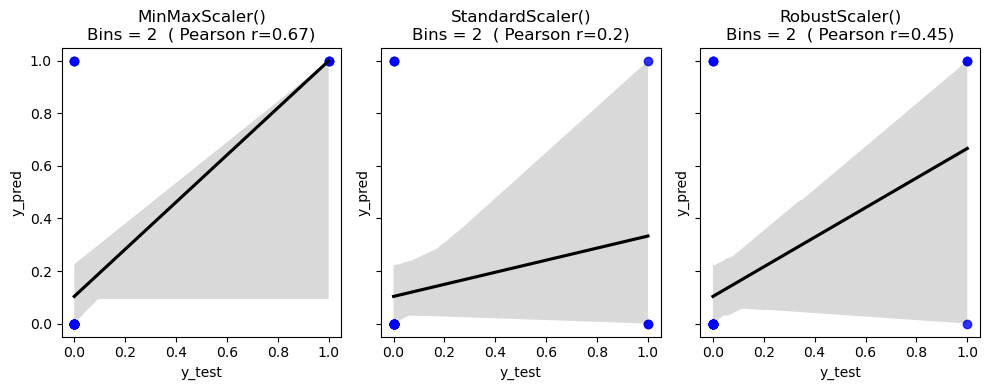

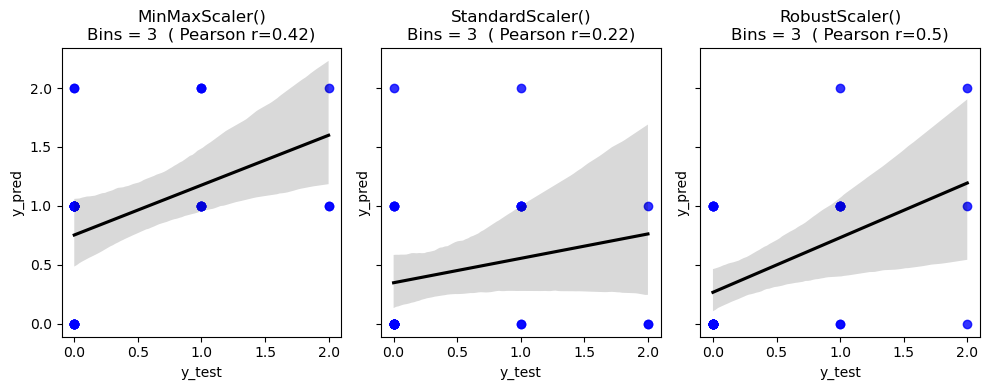

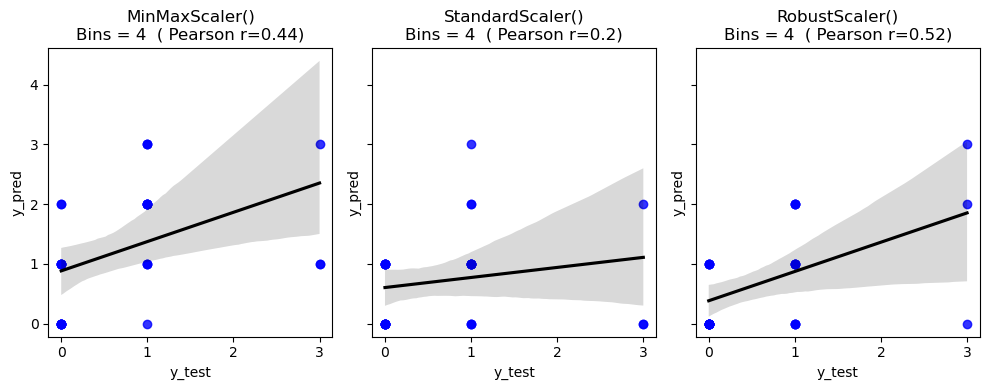

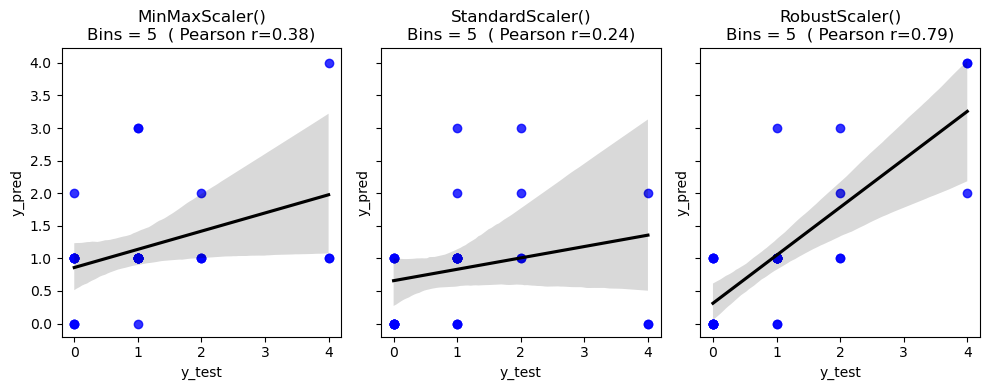

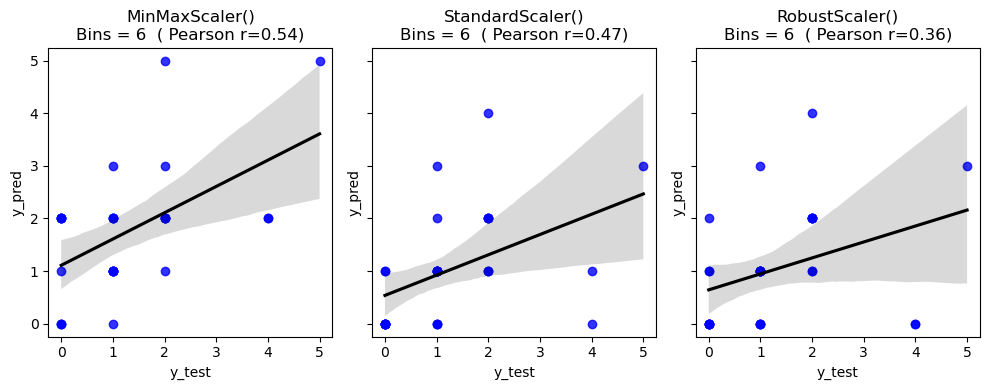

In [45]:
print('\n------------------------- Classification -------------------------')
print('Breaking down continuous values of PRICE to following bins and checking classification accuracy')

# For loop to compare performance of ML Model with Bins=2 to Bins=6
for i in range(5):
    
    # Label encoding and Binning of price data for conersion of continuos to categorical data
    label_encoder = LabelEncoder()
    n_bins = i+2
    y = label_encoder.fit_transform(pd.cut(df['Price (USD)'], n_bins, retbins=True)[0])
    df_bins = pd.DataFrame()
    
    df_bins['bins'] = (pd.cut(df['Price (USD)'], n_bins,retbins=False))
    df_bins['bins'] = df_bins['bins'].astype(str) 
    bins_ = df_bins['bins'].unique()[0:n_bins]
    print('\n\nWith Bins =',n_bins,'Bin Ranges:', bins_)

    X = df[cols_].values
    
    # 70% training dataset and 30% test dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

    # Use of 3 scalers for performance comparison
    sc_s = [MinMaxScaler(), StandardScaler(), RobustScaler()]
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 4))
    i=0
    print('\t MinMaxScaler \t      StandardScaler \t RobustScaler')
    print('Pearson r = ',end="")
    for sc in sc_s:
        X_train_sc = sc.fit_transform(X_train)
        X_test_sc = sc.transform(X_test)
        
        # Decision Tree Classifier is used with maximum depth = 10 (To avoid overfitting low number is used)
        # For node splitting - Gini Index is used as the metric
        DTC = DecisionTreeClassifier(max_depth=10, criterion='gini')
        clf = DTC.fit(X_train_sc,y_train)
        y_pred = clf.predict(X_test_sc)
        df_temp = pd.DataFrame()
        df_temp['y_test'] = y_test
        df_temp['y_pred'] = y_pred
        ax = axes[i]
        sns.regplot(ax=ax, data=df_temp, x='y_test', y='y_pred', color='blue', line_kws={'color': 'black'})
        ax.set_title(str(sc)+'\nBins = '+str(n_bins) + 
                     '  ( Pearson r=' + str(df_temp[['y_test', 'y_pred']].corr().iloc[0,1].round(2)) + ')')
        
        # Use of Pearson r score metric to judge the performance of algorithm
        if(df_temp[['y_test', 'y_pred']].corr().iloc[0,1].astype(float).round(2) == np.nan):
            corr_ = 0.00
        else:
            corr_ = df_temp[['y_test', 'y_pred']].corr().iloc[0,1].astype(float)
        print('%.2f'%round(corr_,2),end="\t\t")
        plt.tight_layout()
        plt.draw()
        i += 1

###### Pearson R score is a metric to analyze the prediction of price band. 
Since train_test_split function is used which randomly splits into training and test set, Pearson value may show different value at every run

It is observed that with bins = 5, RobustScaler shows the best performance with Pearson r score = 0.79 which shows a significant and positive relationship exists between the input feature vectors and output – Price of Backpacks.


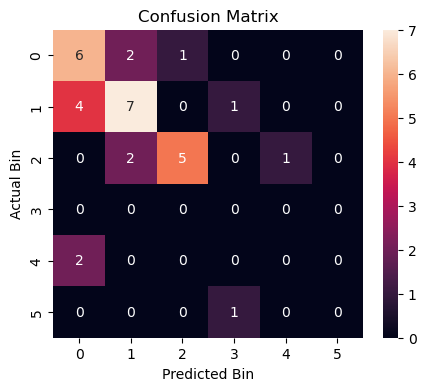

In [46]:
# Building a Confusion Matrix for Classification model on test dataset

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = [i for i in range(6)], 
                     columns = [i for i in range(6)])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Bin')
plt.xlabel('Predicted Bin')
plt.show()

# Regression

Regression is a type of supervised learning in machine learning, where the algorithm is trained to predict a continuous numerical value, also known as a target variable. 


------------------------- Regression -------------------------

Using Stochastic Gradient Descent Model : RMSE =  55.79
Using Stochastic Gradient Descent Model : Pearsons r =  0.76

Using LinearRegression Model : RMSE =  53.55
Using Stochastic Gradient Descent Model : Pearson r =  0.79


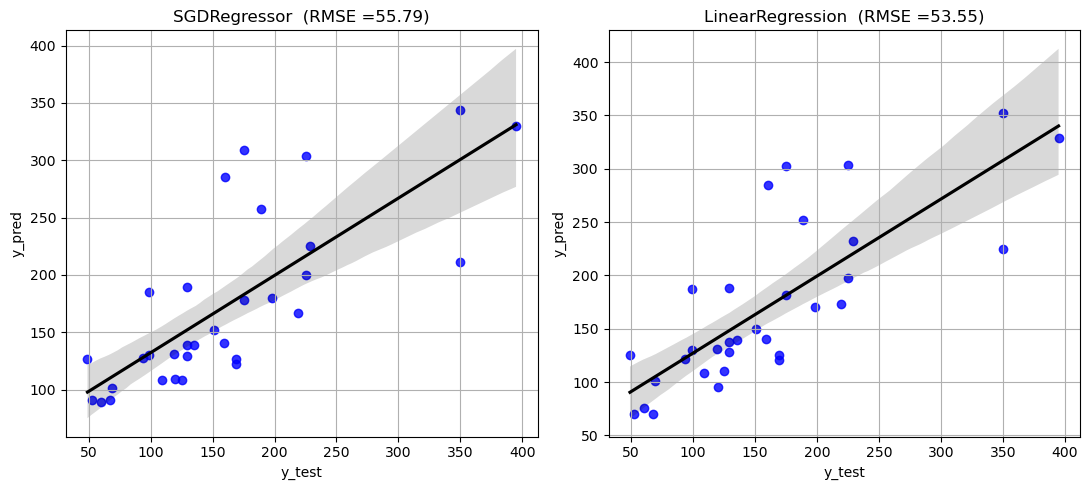

In [47]:
print('\n------------------------- Regression -------------------------')
X = df[cols_].values
y = df['Price (USD)'].values

# Random splitting the entire data into Training Dataset (70%) and Test Dataset (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scaling the data with RobustScaler() which was last used in classification model building activity
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Function to Regression line plot using seaborn library 
def sns_plot(y_test,y_pred,ax_,rmse_,title_):
    df_temp = pd.DataFrame()
    df_temp['y_test'] = y_test
    df_temp['y_pred'] = y_pred
    ax = ax_
    ax.grid()
    sns.regplot(ax=ax, data=df_temp, x='y_test', y='y_pred', color='blue', line_kws={'color': 'black'})
    ax.set_title(title_+'  (RMSE =' + rmse_+ ')')
    plt.tight_layout()
    plt.draw()
    
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(11,5))

# Stochastic Gradient Descent Regression Model
# Max_Itr increased to avoid convergence error
clf_ = SGDRegressor(max_iter=5000)
clf_.fit(X_train_sc, y_train)
y_pred=clf_.predict(X_test_sc)

df_temp = pd.DataFrame()
df_temp['y_test'] = y_test
df_temp['y_pred'] = y_pred
corr_ = df_temp[['y_test', 'y_pred']].corr().iloc[0,1].astype(float)

rmse_ = str('{:0.2f}'.format(round(np.sqrt(mean_squared_error(y_test, y_pred)),2)))
ax_ = axes[0]
sns_plot(y_test,y_pred,ax_,rmse_,title_ = 'SGDRegressor')
print('\nUsing Stochastic Gradient Descent Model : RMSE = ',rmse_)
print('Using Stochastic Gradient Descent Model : Pearsons r = ',round(corr_,2))

# Linear regression model - defined in Sci-kit_learn python library
reg = linear_model.LinearRegression()
reg.fit(X_train_sc, y_train)
y_pred = reg.predict(X_test_sc)
      
df_temp = pd.DataFrame()
df_temp['y_test'] = y_test
df_temp['y_pred'] = y_pred

# Pearson's r score metric for performance check
corr_ = df_temp[['y_test', 'y_pred']].corr().iloc[0,1].astype(float)
      
# Root Mean Square Error calculation
mse_ = str('{:0.2f}'.format(round(np.sqrt(mean_squared_error(y_test, y_pred)),2)))
ax_ = axes[1]
sns_plot(y_test,y_pred,ax_, mse_,title_ = 'LinearRegression')
print('\nUsing LinearRegression Model : RMSE = ',round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print('Using Stochastic Gradient Descent Model : Pearson r = ',round(corr_,2))


In [48]:
# Linear Regression using Linear Regression with Lasso (L2) Regularization

print('\nUsing Linear Regression with Lasso (L2) Regularization:')
rmse_scores = []     # List to maintain the cross-validation scores
Lambda = []     # List to maintain the different values of Lambda
for i in range(1, 9):
    lassoModel = Lasso(alpha=i * 0.25, tol=0.0925)
    lassoModel.fit(X_train_sc, y_train)
    y_pred = lassoModel.predict(X_test_sc)
    
    df_temp = pd.DataFrame()
    df_temp['y_test'] = y_test
    df_temp['y_pred'] = y_pred
    
    # Pearson's r score and RMSE performance metric
    corr_ = df_temp[['y_test', 'y_pred']].corr().iloc[0,1].astype(float)

    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)).round(2))
    Lambda.append(i * 0.25)
    print('Lamba = ',str(Lambda[i-1]) + ' gives MSE = ' + str(rmse_scores[i-1]),'Pearson r = ',round(corr_,2))

min_rmse_pos = rmse_scores.index(min(rmse_scores))
print('Minimum RMSE =',rmse_scores[min_rmse_pos],'obtained for Lambda =',Lambda[min_rmse_pos])


Using Linear Regression with Lasso (L2) Regularization:
Lamba =  0.25 gives MSE = 51.1 Pearson r =  0.82
Lamba =  0.5 gives MSE = 52.61 Pearson r =  0.8
Lamba =  0.75 gives MSE = 53.81 Pearson r =  0.79
Lamba =  1.0 gives MSE = 54.61 Pearson r =  0.78
Lamba =  1.25 gives MSE = 55.78 Pearson r =  0.76
Lamba =  1.5 gives MSE = 57.46 Pearson r =  0.74
Lamba =  1.75 gives MSE = 59.67 Pearson r =  0.71
Lamba =  2.0 gives MSE = 62.3 Pearson r =  0.67
Minimum RMSE = 51.1 obtained for Lambda = 0.25


For regression, we tried and tested 3 ML models - Linear Regression, Stochastic Gradient Regression (SGD) and Linear Regression with Lasso (L2) regularization. Metric used to compare the accuracy of the ML models is RMSE (Root Mean Square Error) and Pearson's r Score.


For the problem dataset, minimum RMSE of 51.1 is obtained for Linear Regression with Lasso (L2) regularization with Lambda = 0.25. Thus it is the best for this dataset. <br><br>
Both Classification and Regression show nearly similar performance with Classification having 0.79 and regression having 0.82 maximum Pearson’s r score value.

# ENSEMBLE

For Ensemble ML Model development Random Forest is used


------------------------- Ensemble (Random Forest Classifier) -------------------------
Breaking down continuous values of PRICE to following bins and checking classification accuracy

Bins = 2 , Pearson r = 0.53
Categories: ['(48.554, 236.965]' '(236.965, 425.0]']

Bins = 3 , Pearson r = 0.57
Categories: ['(48.554, 174.287]' '(174.287, 299.643]' '(299.643, 425.0]']

Bins = 4 , Pearson r = 0.64
Categories: ['(48.554, 142.948]' '(142.948, 236.965]' '(236.965, 330.982]'
 '(330.982, 425.0]']

Bins = 5 , Pearson r = 0.55
Categories: ['(124.144, 199.358]' '(48.554, 124.144]' '(199.358, 274.572]'
 '(274.572, 349.786]' '(349.786, 425.0]']

Bins = 6 , Pearson r = 0.56
Categories: ['(111.608, 174.287]' '(48.554, 111.608]' '(174.287, 236.965]'
 '(236.965, 299.643]' '(299.643, 362.322]' '(362.322, 425.0]']

Bins = 7 , Pearson r = 0.46
Categories: ['(102.654, 156.379]' '(48.554, 102.654]' '(156.379, 210.103]'
 '(210.103, 263.827]' '(317.551, 371.276]' '(371.276, 425.0]'
 '(263.827, 317.551]']


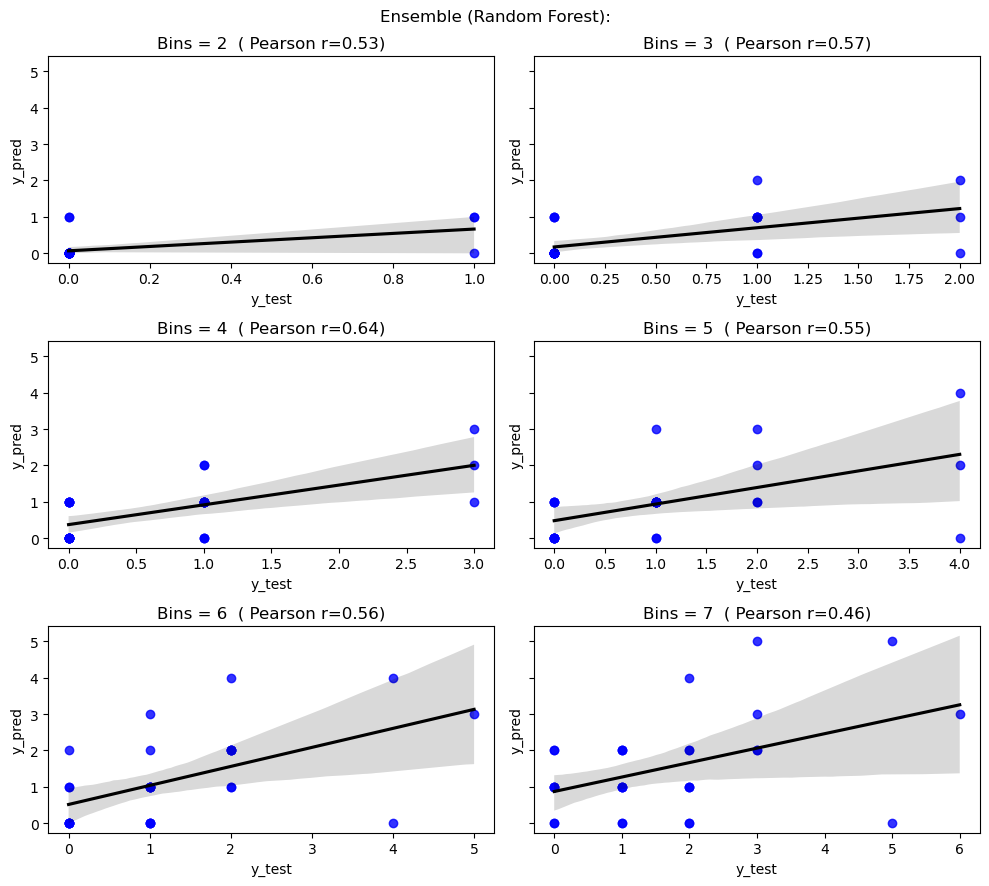

In [49]:
# Ensemble ML Model - Random Forest Classifier

print('\n------------------------- Ensemble (Random Forest Classifier) -------------------------')
print('Breaking down continuous values of PRICE to following bins and checking classification accuracy')
fig, axes = plt.subplots(3, 2, sharey=True, figsize=(10,9))
fig.suptitle('Ensemble (Random Forest):')
for i in range(6):
    
    # Label Encoding and binning to convert numeric contiuous data to categorical data for classification
    label_encoder = LabelEncoder()
    n_bins = i+2
    
    y = label_encoder.fit_transform(pd.cut(df['Price (USD)'], n_bins, retbins=True)[0])
    df_bins = pd.DataFrame()
    df_bins['bins'] = (pd.cut(df['Price (USD)'], n_bins,retbins=False))
    df_bins['bins'] = df_bins['bins'].astype(str)

    X = df[cols_].values
    
    # Random Splitting entire dataset into Training (70%) and Test (30%) Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Scaling the traing and Test X data using Robust scaler (Last used in Regression)
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)

    # Random Forest Classifier with Gini index metric
    rfc = RandomForestClassifier(verbose=0, criterion = 'gini')
    clf = rfc.fit(X_train_sc,y_train)
    y_pred = clf.predict(X_test_sc)
    
    df_temp = pd.DataFrame()
    df_temp['y_test'] = y_test
    df_temp['y_pred'] = y_pred
    
    # Axis definition as per plot number - row and column location
    ax = axes[i // 2, i%2]
    sns.regplot(ax=ax, data=df_temp, x='y_test', y='y_pred', color='blue', line_kws={'color': 'black'})
    
    ax.set_title('Bins = '+str(n_bins) + '  ( Pearson r=' + str(df_temp[['y_test', 'y_pred']].corr().iloc[0,1].round(2)) + ')')
    
    # Pearson's r score metric
    print('\nBins =',n_bins, ", Pearson r =",df_temp[['y_test', 'y_pred']].corr().iloc[0,1].round(2))
    print('Categories:', df_bins['bins'].unique()[0:n_bins])
plt.tight_layout()
plt.draw()

Pearson R score is a metric to analyze the prediction of price band. 
Since train_test_split function is used which randomly splits into tarining and test set, Pearson value may show different value at every run
<br>
Maximum Pearson r score observed by using Random Forest algorithm is 0.64 with bins = 4. As was highlighted during classification algorithm development, Pearson’s R score is a better metric than using confusion matrix with Accuracy and F1 Score.<br><br>
A Pearson r score of 0.64 shows that the algorithm is of not a good quality and is not able to predict price to a good extent. Any value greater than 0.75 is considered a good score in terms of prediction accuracy. However, since Random Forest is an extension of Decision Tree algorithm, an extra step has been taken to have a one to one comparison of both with same Train and Test datasets. This is explored as below.


# Random Forest vs Decision Tree - To compare Classification with Ensemble approach


------------------------- Decision Tree v/s Random Forest -------------------------
Breaking down continuous values of PRICE to following bins and checking classification accuracy
Bins =  2  , Categories: ['(48.554, 236.965]' '(236.965, 425.0]']
Bins =  3  , Categories: ['(48.554, 174.287]' '(174.287, 299.643]' '(299.643, 425.0]']
Bins =  4  , Categories: ['(48.554, 142.948]' '(142.948, 236.965]' '(236.965, 330.982]'
 '(330.982, 425.0]']
Bins =  5  , Categories: ['(124.144, 199.358]' '(48.554, 124.144]' '(199.358, 274.572]'
 '(274.572, 349.786]' '(349.786, 425.0]']
Bins =  6  , Categories: ['(111.608, 174.287]' '(48.554, 111.608]' '(174.287, 236.965]'
 '(236.965, 299.643]' '(299.643, 362.322]' '(362.322, 425.0]']
Bins =  7  , Categories: ['(102.654, 156.379]' '(48.554, 102.654]' '(156.379, 210.103]'
 '(210.103, 263.827]' '(317.551, 371.276]' '(371.276, 425.0]'
 '(263.827, 317.551]']


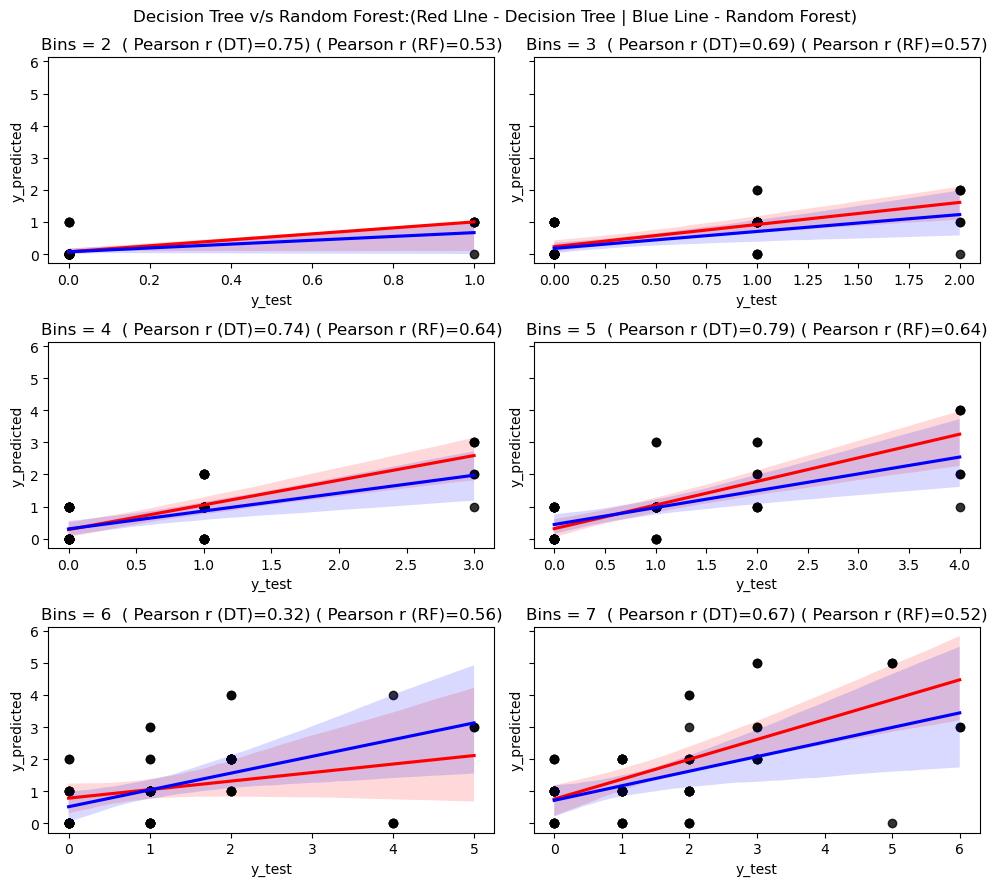

In [50]:
# Comparison of Random Forest with Decision Tree ML algorithms

print('\n------------------------- Decision Tree v/s Random Forest -------------------------')
print('Breaking down continuous values of PRICE to following bins and checking classification accuracy')
fig, axes = plt.subplots(3, 2, sharey=True, figsize=(10,9))
fig.suptitle('Decision Tree v/s Random Forest:(Red LIne - Decision Tree | Blue Line - Random Forest)')
for i in range(6):
    
    # Label Encoding and binning to convert numeric continuous data to categorical 
    label_encoder = LabelEncoder()
    n_bins = i+2
    y = label_encoder.fit_transform(pd.cut(df['Price (USD)'], n_bins, retbins=True)[0])
    df_bins = pd.DataFrame()
    df_bins['bins'] = (pd.cut(df['Price (USD)'], n_bins,retbins=False))
    df_bins['bins'] = df_bins['bins'].astype(str)

    X = df[cols_].values
    
    # Random splitting entire dataset - 70% Training and 30% Test Datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
    
    # Robust scaling
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)

    # Decision Tree Classifier
    DTC = DecisionTreeClassifier()
    clf = DTC.fit(X_train_sc,y_train)
    y_pred = clf.predict(X_test_sc)
    df_temp = pd.DataFrame()
    df_temp['y_test'] = y_test
    df_temp['y_pred1'] = y_pred
    ax = axes[i // 2, i % 2]
    sns.regplot(ax=ax, data=df_temp, x='y_test', y='y_pred1', color='black', line_kws={'color': 'red'})

    # Random Forest Classifier
    rfc = RandomForestClassifier(verbose=0,criterion='gini')
    clf = rfc.fit(X_train_sc,y_train)
    y_pred = clf.predict(X_test_sc)
    df_temp['y_test'] = y_test
    df_temp['y_predicted'] = y_pred
    sns.regplot(ax=ax, data=df_temp, x='y_test', y='y_predicted', color='black', line_kws={'color': 'blue'})

    ax.set_title('Bins = '+str(n_bins) + '  ( Pearson r (DT)=' +
                 str(df_temp[['y_test', 'y_pred1']].corr().iloc[0,1].round(2)) + ')'+
                 ' ( Pearson r (RF)=' +
                 str(df_temp[['y_test', 'y_predicted']].corr().iloc[0,1].round(2)) + ')')

    print('Bins = ',n_bins,' , Categories:', df_bins['bins'].unique()[0:n_bins])
plt.tight_layout()
plt.show()


It is observed that Decision Tree is showing higher value of Pearson r score than Random Forest. This may be because Random Forest gives majority voting / average output of multiple decision trees.<br>
However, these numbers may change if the algorithm is rerun, since the entire dataset is split using train_test_split function which splits the data randomly into train and test datasets.

## Summary
Machine learning activity was performed successfully for the given dataset. This was done by using a knowledge discovery process consisting of the phases, gathering data, pre-processing data, choosing an appropriate data mining approach to find patterns among the data and interpreting them.  <br>

After KDD process, feature engineering is carried out on the dataset for machine learning readiness. Then 3 different types of supervised ML algorithms are developed namely Classification type, Regression type and Ensemble type. Out of these 3, classification and regression, both gave best performance with maximum Pearson r score of 0.79 and 0.82 respectively. Generally, a good Pearson r score is assumed to be above 0.75. However, this is not a hard written threshold. <br><br>
Overall, classification and regression are two fundamental types of supervised learning used to make predictions on data, while ensemble learning is a technique to improve the accuracy and robustness of these predictions by combining multiple models.

#### Thank You